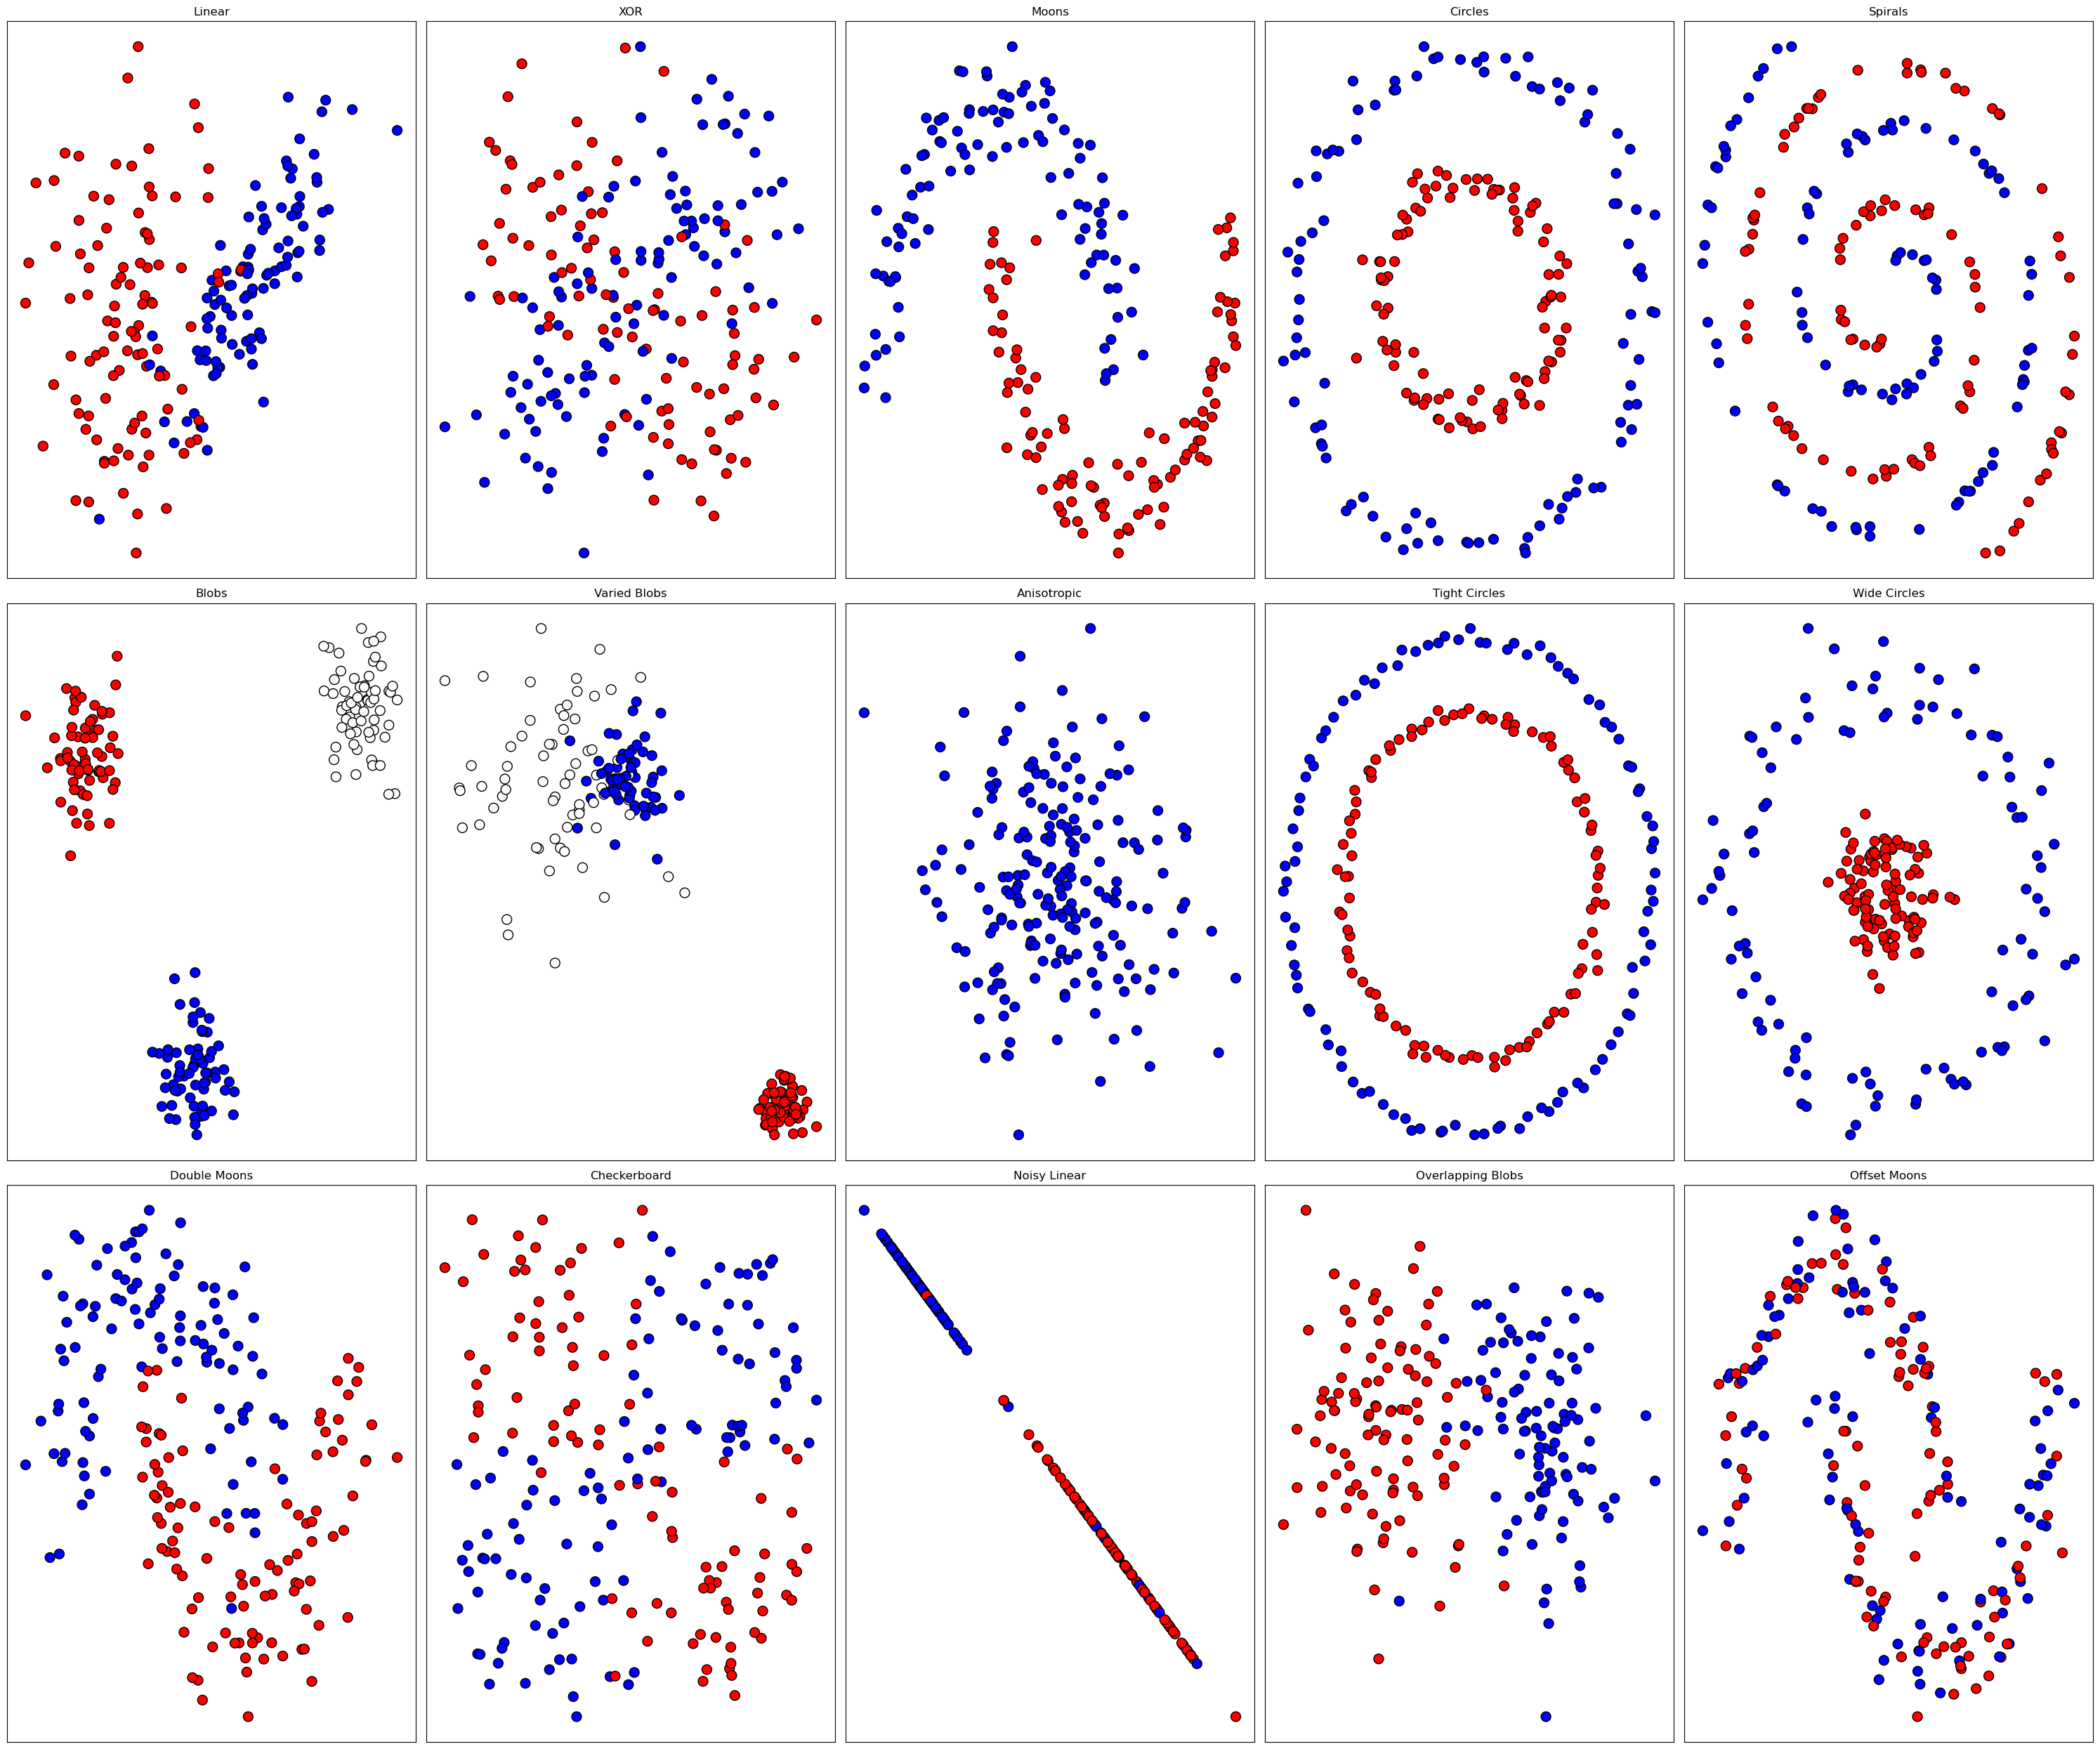

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import (
    make_classification,
    make_blobs,
    make_moons,
    make_circles
)
import numpy as np

# XOR Pattern
def make_xor(n_samples=200, noise=0.1):
    X = np.random.rand(n_samples, 2)
    y = (X[:, 0] > 0.5) ^ (X[:, 1] > 0.5)
    if noise > 0:
        X += noise * np.random.randn(*X.shape)
    return X, y.astype(int)

# Spiral Pattern
def make_spirals(n_samples=100, noise=0.2):
    n = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_samples, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples, 1) * noise
    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
    return X, y.astype(int)

# Checkerboard pattern
def make_checkerboard(n_samples=200, noise=0.05):
    x = np.random.rand(n_samples) * 2 - 1
    y = np.random.rand(n_samples) * 2 - 1
    labels = ((x > 0) ^ (y > 0)).astype(int)
    X = np.stack([x, y], axis=1) + noise * np.random.randn(n_samples, 2)
    return X, labels

# Plotting function
def plot_dataset(X, y, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

# Generate all datasets (sorted by most used / most important)
datasets = [
    ("Linear", make_classification(n_samples=200, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1)),
    ("XOR", make_xor(n_samples=200, noise=0.1)),
    ("Moons", make_moons(n_samples=200, noise=0.1)),
    ("Circles", make_circles(n_samples=200, noise=0.05, factor=0.5)),
    ("Spirals", make_spirals(n_samples=100, noise=0.5)),
    ("Blobs", make_blobs(n_samples=200, centers=3, cluster_std=1.0)),
    ("Varied Blobs", make_blobs(n_samples=200, centers=3, cluster_std=[1.0, 2.5, 0.5])),
    ("Anisotropic", make_blobs(n_samples=200, centers=1, cluster_std=2.5)),
    ("Tight Circles", make_circles(n_samples=200, noise=0.02, factor=0.7)),
    ("Wide Circles", make_circles(n_samples=200, noise=0.1, factor=0.2)),
    ("Double Moons", make_moons(n_samples=200, noise=0.2)),
    ("Checkerboard", make_checkerboard(n_samples=200, noise=0.1)),
    ("Noisy Linear", make_classification(n_samples=200, n_features=2, n_informative=1,
                                         n_redundant=1, n_clusters_per_class=1, flip_y=0.2)),
    ("Overlapping Blobs", make_blobs(n_samples=200, centers=2, cluster_std=2.5)),
    ("Offset Moons", (make_moons(n_samples=200, noise=0.1)[0] + [1.5, 0.5],
                      make_moons(n_samples=200, noise=0.1)[1]))
]

# Plot all
fig, axs = plt.subplots(3, 5, figsize=(30, 25))
axs = axs.ravel()
for i, (title, (X, y)) in enumerate(datasets):
    plot_dataset(X, y, title, axs[i])

plt.tight_layout()
plt.show()
